# **어텐션**

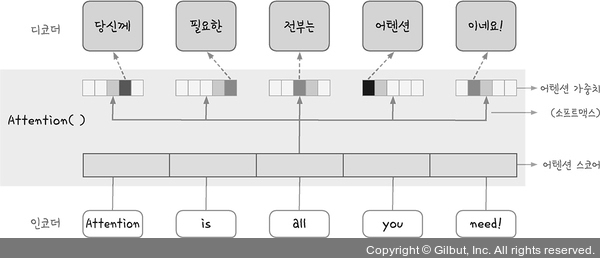

In [ ]:
!pip install attention

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb, reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')

# 단어의 수를 맞춤
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, None, 100)         100000    
                                                                 
 dropout_32 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_21 (LSTM)              (None, None, 64)          42240     
                                                                 
 attention_21 (Attention)    (None, 128)               20480     
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 46)                5934      
                                                                 
Total params: 168,654
Trainable params: 168,654
Non-t

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 31s 63ms/step - loss: 1.8921 - accuracy: 0.5167 - val_loss: 1.6498 - val_accuracy: 0.5797
Epoch 2/200
450/450 [==============================] - 28s 62ms/step - loss: 1.4829 - accuracy: 0.6281 - val_loss: 1.4134 - val_accuracy: 0.6429
Epoch 3/200
450/450 [==============================] - 30s 67ms/step - loss: 1.2803 - accuracy: 0.6835 - val_loss: 1.2863 - val_accuracy: 0.6825
Epoch 4/200
450/450 [==============================] - 28s 62ms/step - loss: 1.1421 - accuracy: 0.7115 - val_loss: 1.2600 - val_accuracy: 0.6785
Epoch 5/200
450/450 [==============================] - 28s 62ms/step - loss: 1.0485 - accuracy: 0.7393 - val_loss: 1.1899 - val_accuracy: 0.7017
Epoch 6/200
450/450 [==============================] - 28s 62ms/step - loss: 0.9694 - accuracy: 0.7560 - val_loss: 1.1480 - val_accuracy: 0.7128
Epoch 7/200
450/450 [==============================] - 28s 62ms/step - loss: 0.9087 - accuracy: 0.7695 - val_loss: 1.1371 - val_ac

In [ ]:
model.evaluate(X_test, y_test)[1]

71/71 [==============================] - 2s 30ms/step - loss: 1.1384 - accuracy: 0.7360


0.7359750866889954

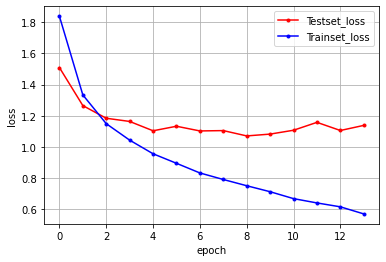

In [ ]:
# 학습셋과 테스트셋의 오차 저장 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()